In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
#importar os dados
dados = pd.read_excel("Coffee_Shop_Sales_Dataset.xlsx")
dados.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Coffee_Shop_Sales.xlsx'

In [ ]:
#removendo colunas desnecessárias 
dados = dados.drop(columns=['transaction_time', 'store_id','product_id', 'Month', 'Weekday'])
dados.head()

,transaction_id,transaction_date,transaction_qty,store_location,unit_price,product_category,product_type,product_detail,Revenue,Month.1,Weekday.1,Hour
0,1,2023-01-01,2,Lower Manhattan,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,Jan,Sun,7
1,2,2023-01-01,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,Jan,Sun,7
2,3,2023-01-01,2,Lower Manhattan,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,Jan,Sun,7
3,4,2023-01-01,1,Lower Manhattan,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,Jan,Sun,7
4,5,2023-01-01,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,Jan,Sun,7


In [ ]:
#renomeando colunas
dados.columns = ['Transaction Id', 'Transaction Date', 'Transaction Quantity', 'Store Location', 'Unit Price', 'Product Category', 'Product Type', 'Product Detail', 'Revenue By Item', 'Month','Weekday', 'Hour']
dados.head()

,Transaction Id,Transaction Date,Transaction Quantity,Store Location,Unit Price,Product Category,Product Type,Product Detail,Revenue By Item,Month,Weekday,Hour
0,1,2023-01-01,2,Lower Manhattan,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,Jan,Sun,7
1,2,2023-01-01,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,Jan,Sun,7
2,3,2023-01-01,2,Lower Manhattan,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,Jan,Sun,7
3,4,2023-01-01,1,Lower Manhattan,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,Jan,Sun,7
4,5,2023-01-01,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,Jan,Sun,7


In [ ]:
#verificar se tem NA
dados.isnull().sum()

Transaction Id          0
Transaction Date        0
Transaction Quantity    0
Store Location          0
Unit Price              0
Product Category        0
Product Type            0
Product Detail          0
Revenue By Item         0
Month                   0
Weekday                 0
Hour                    0
dtype: int64

In [ ]:
#Calcular receita total
Revenue = dados['Revenue By Item'].sum()
print(Revenue)

698812.3300000002


In [ ]:
#Verificando o produto mais vendido 
best_selling = dados['Product Type'].value_counts()
best_selling

Product Type
Brewed Chai tea          17183
Gourmet brewed coffee    16912
Barista Espresso         16403
Hot chocolate            11468
Brewed Black tea         11350
Brewed herbal tea        11245
Scone                    10173
Organic brewed coffee     8489
Drip coffee               8477
Premium brewed coffee     8135
Pastry                    6912
Biscotti                  5711
Brewed Green tea          5671
Regular syrup             4979
Sugar free syrup          1811
Housewares                 526
Chai tea                   443
Organic Beans              415
Gourmet Beans              366
Premium Beans              336
Espresso Beans             319
Herbal tea                 305
Black tea                  303
Drinking Chocolate         266
Organic Chocolate          221
Clothing                   221
House blend Beans          183
Green tea                  159
Green beans                134
Name: count, dtype: int64

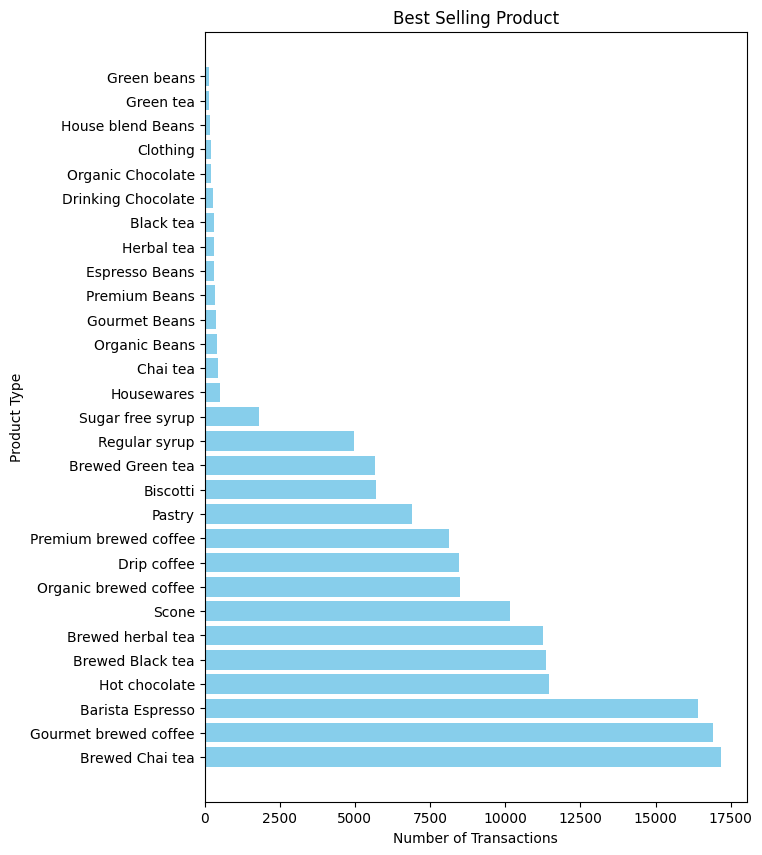

In [ ]:
plt.figure(figsize=(7, 10))
plt.barh(best_selling.index, best_selling.values, color='skyblue')
plt.title("Best Selling Product")
plt.xlabel("Number of Transactions")
plt.ylabel("Product Type")
plt.show()

In [ ]:
#Verificando qual categoria gera mais receita
revenue_by_category = dados.groupby('Product Category')['Revenue By Item'].sum()
revenue_by_category

Product Category
Bakery                 82315.64
Branded                13607.00
Coffee                269952.45
Coffee beans           40085.25
Drinking Chocolate     72416.00
Flavours                8408.80
Loose Tea              11213.60
Packaged Chocolate      4407.64
Tea                   196405.95
Name: Revenue By Item, dtype: float64

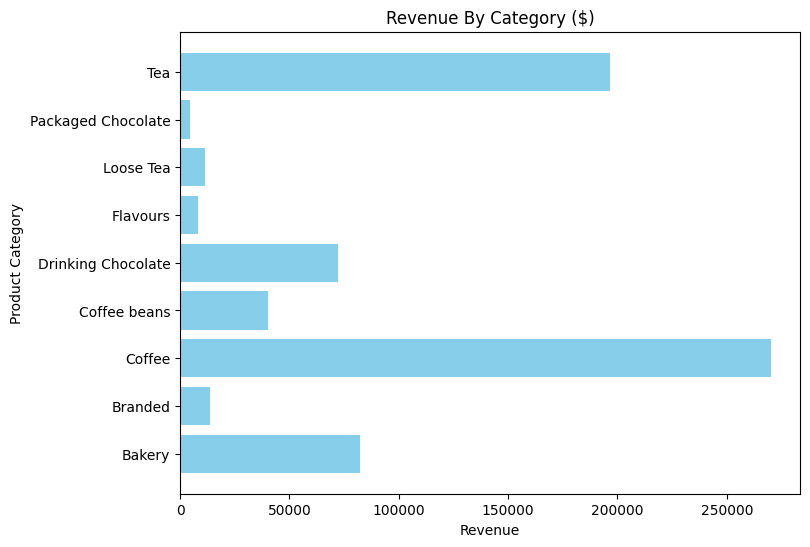

In [ ]:
plt.figure(figsize=(8, 6))
plt.barh(revenue_by_category.index, revenue_by_category.values, color='skyblue')
plt.title("Revenue By Category ($)")
plt.xlabel("Revenue")
plt.ylabel("Product Category")
plt.show()

In [ ]:
#Verificando qual horário vende mais
transactions_by_hour = dados['Hour'].value_counts().sort_index()
transactions_by_hour

Hour
6      4594
7     13428
8     17654
9     17764
10    18545
11     9766
12     8708
13     8714
14     8933
15     8979
16     9093
17     8745
18     7498
19     6092
20      603
Name: count, dtype: int64

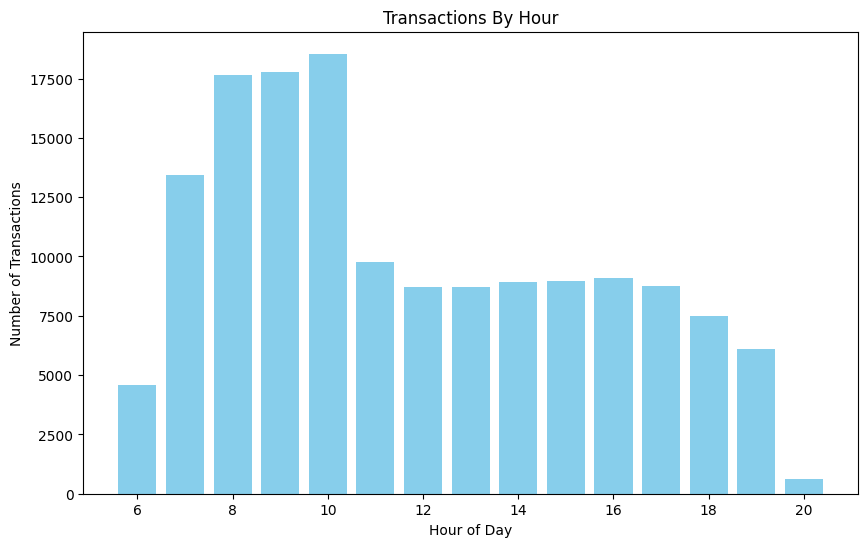

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(transactions_by_hour.index, transactions_by_hour.values, color='skyblue')
plt.title("Transactions By Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Transactions")
plt.show()


In [ ]:
#Deixando os meses na ordem correta
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',]
dados['Month'] = pd.Categorical(dados['Month'], categories=month_order, ordered=True)

#Verificando qual mês gerou mais receita
revenue_by_month = dados.groupby('Month', observed=True)['Revenue By Item'].sum()
revenue_by_month

Month
Jan     81677.74
Feb     76145.19
Mar     98834.68
Apr    118941.08
May    156727.76
Jun    166485.88
Name: Revenue By Item, dtype: float64

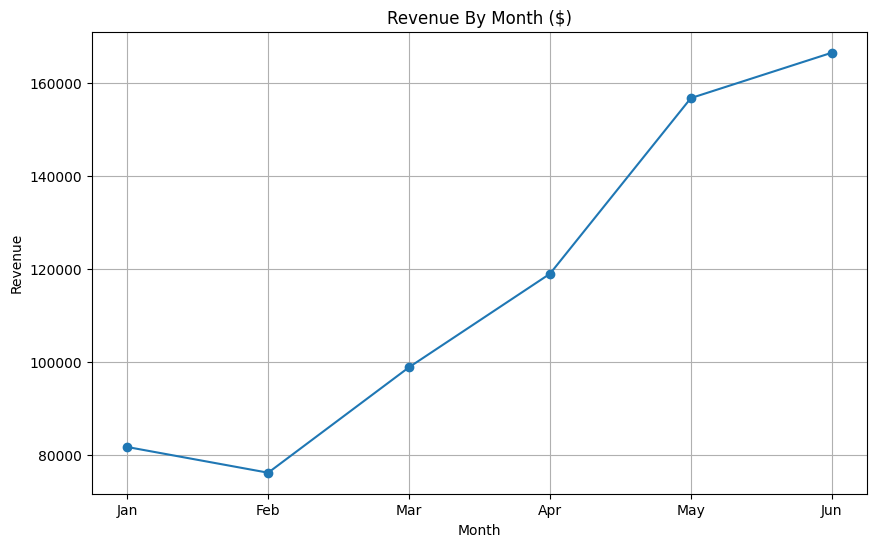

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(revenue_by_month.index, revenue_by_month.values, marker='o')
plt.title("Revenue By Month ($)")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()

In [ ]:
#Qual loja gerou mais receita?
revenue_by_store = dados.groupby('Store Location')['Revenue By Item'].sum()
revenue_by_store

Store Location
Astoria            232243.91
Hell's Kitchen     236511.17
Lower Manhattan    230057.25
Name: Revenue By Item, dtype: float64

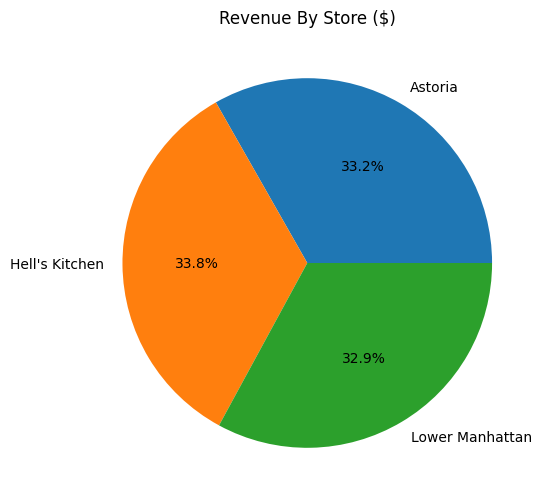

In [ ]:
plt.figure(figsize=(10, 6))
plt.pie(revenue_by_store, labels=revenue_by_store.index, autopct='%1.1f%%')
plt.title("Revenue By Store ($)")
plt.show()

In [5]:
#Verificando qual categoria gera mais receita
transactions_by_category = dados.groupby('Product Category')['Transaction Quantity'].sum()
transactions_by_category

NameError: name 'dados' is not defined

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh()
plt.title("Revenue By Store ($)")
plt.show()